# SYSTEMY ROZMYTE 2

In [1]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\user\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (0.4.2)
Could not build wheels for scikit-fuzzy, since package 'wheel' is not installed.
Could not build wheels for numpy, since package 'wheel' is not installed.
Could not build wheels for scipy, since package 'wheel' is not installed.
Could not build wheels for networkx, since package 'wheel' is not installed.
Could not build wheels for decorator, since package 'wheel' is not installed.


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Wynik dla:  kino
50.0 % pewnosci wyboru
Wynik dla:  teatr
24.0 % pewnosci wyboru
Wynik dla:  restauracja
17.0 % pewnosci wyboru
Wynik dla:  sport na powietrzu
51.0 % pewnosci wyboru
Wynik dla:  sport w klubie
50.0 % pewnosci wyboru
Wynik dla:  basen
50.0 % pewnosci wyboru
Wynik dla:  czytanie
59.0 % pewnosci wyboru
Wynik dla:  film w domu
59.0 % pewnosci wyboru
---------- Wtorek, luty ----------
Wynik dla:  kino
50.0 % pewnosci wyboru
Wynik dla:  teatr
24.0 % pewnosci wyboru
Wynik dla:  restauracja
17.0 % pewnosci wyboru


C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backe

Wynik dla:  sport na powietrzu
50.0 % pewnosci wyboru
Wynik dla:  sport w klubie
50.0 % pewnosci wyboru
Wynik dla:  basen
50.0 % pewnosci wyboru
Wynik dla:  czytanie
50.0 % pewnosci wyboru
Wynik dla:  film w domu
50.0 % pewnosci wyboru


C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backe

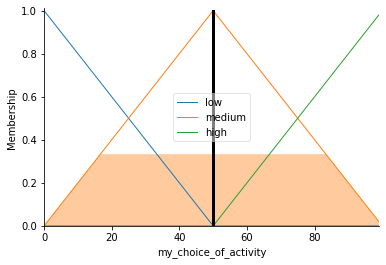

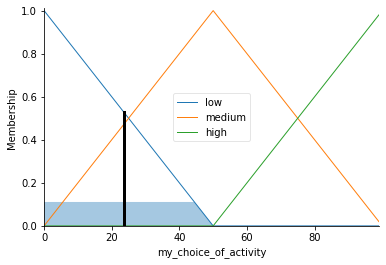

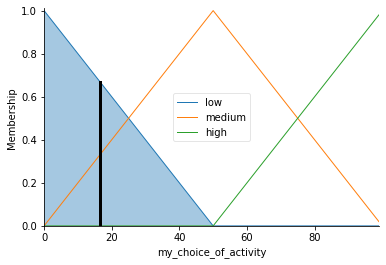

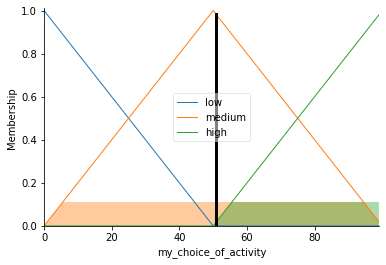

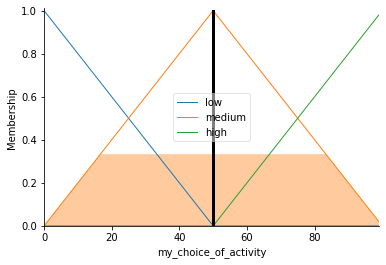

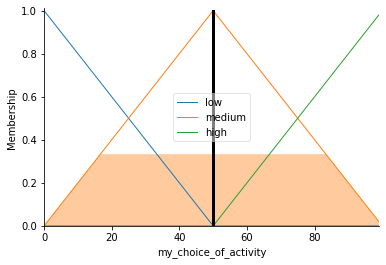

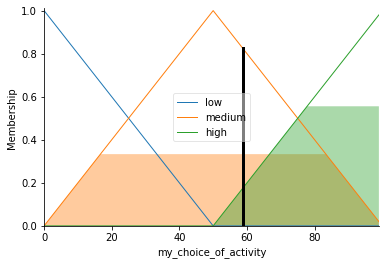

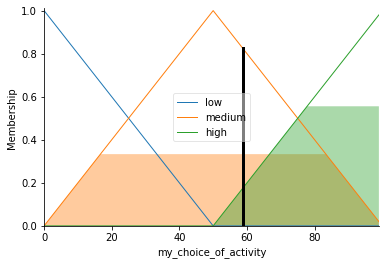

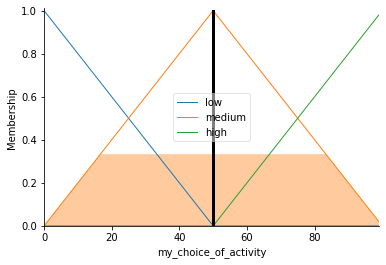

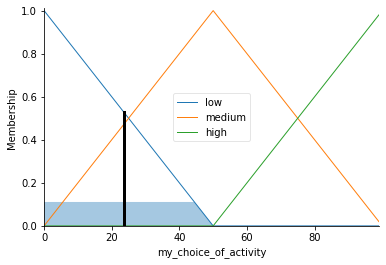

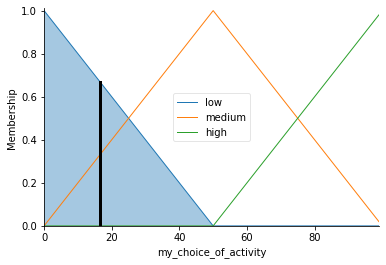

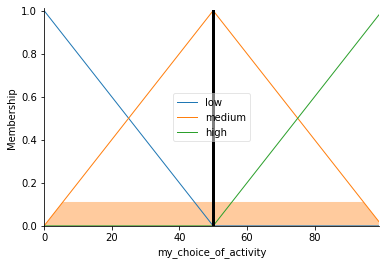

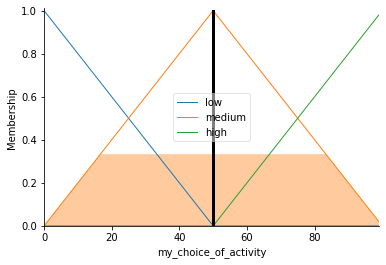

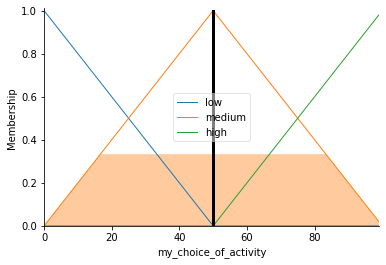

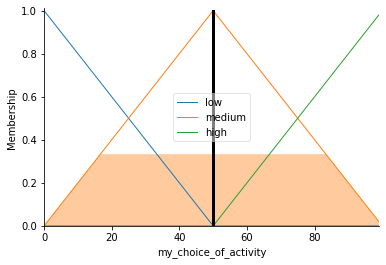

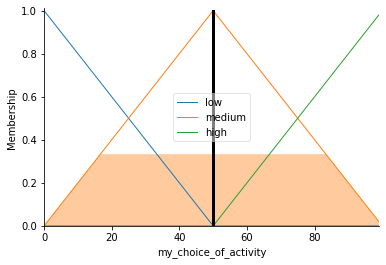

In [3]:
#ponownie skfuzzy
free_time = ctrl.Antecedent(np.arange(0, 1, 0.1), 'free_time')
cost = ctrl.Antecedent(np.arange(0, 1, 0.1), 'cost')
activity_level = ctrl.Antecedent(np.arange(0, 1, 0.1), 'activity_level')
my_choice_of_activity = ctrl.Consequent(np.arange(0, 100, 1), 'my_choice_of_activity')


free_time.automf(5)
cost.automf(5)
activity_level.automf(5)

my_choice_of_activity['low'] = fuzz.trimf(my_choice_of_activity.universe, [0, 0,50])
my_choice_of_activity['medium'] = fuzz.trimf(my_choice_of_activity.universe, [0, 50,100])
my_choice_of_activity['high'] = fuzz.trimf(my_choice_of_activity.universe, [50, 100, 100])

#wytyczne z zadania
rule1 = ctrl.Rule(cost['poor'] & (free_time['good'] | activity_level['good']), my_choice_of_activity['high'])
rule2 = ctrl.Rule(cost['average'] & free_time['average']  , my_choice_of_activity['medium'])
rule3 = ctrl.Rule(cost['good'] | free_time['poor'], my_choice_of_activity['low'])
rule4 = ctrl.Rule(cost['poor'] & (free_time['average'] | activity_level['average']), my_choice_of_activity['medium'])

#ustawianie wytycznych
my_choice_of_activity_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

#wybory
choice = ctrl.ControlSystemSimulation(my_choice_of_activity_ctrl)

#dane z zadania
czas_wolny={"poniedziałek": 0.6, "wtorek": 0.6, "środa": 0.5, "czwartek": 0.5, "piątek": 0.7}
koszty={"kino": 0.6, "teatr": 0.7, "restauracja": 0.9, "sport na powietrzu": 0.2, "sport w klubie": 0.6, "basen": 0.3, "czytanie": 0.1,"film w domu":0.1}
aktywnosc={"styczeń": 0.2, "luty": 0.1, "marzec": 0.5, "kwiecień": 0.5, "maj": 0.7, "czerwiec": 0.8, "lipiec": 0.9,"sierpień":0.9,"wrzesień":0.8,"pażdziernik":0.5,"listopad":0.3,"grudzień":0.2}


#ustawienie petli wyswietlajaca wszystkei dane
def decyzja(dzien_tygodnia,miesiac): 
    for x in zip(koszty.values(),koszty.keys()):
        choice.input['free_time']=czas_wolny.get(dzien_tygodnia)
        choice.input['cost']=x[0]
        choice.input['activity_level']=aktywnosc.get(miesiac)
        choice.compute()
        print("Wynik dla: ",x[1])
        print(np.round(choice.output['my_choice_of_activity']),"% pewnosci wyboru")
        
        my_choice_of_activity.view(sim=choice)

#dane z zadania
dzien_tygodnia="poniedziałek"
miesiac="sierpień"

decyzja(dzien_tygodnia,miesiac)

print("-"*10,"Wtorek, luty","-"*10)
dzien_tygodnia="wtorek"
miesiac="luty"

decyzja(dzien_tygodnia,miesiac)
